In [2]:
!pip install yahoo-fin

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.6 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=73e422f5c7e3754726fe8182a51c26c544179e1094c5f57663e5123a113632c0
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninst

In [3]:
!pip install requests_html

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [6]:
website_url = 'https://finviz.com/quote.ashx?t='
company_tickers = ['AMD', 'AMZN', 'NFLX', 'GOOG']

In [7]:
news_tables = {}
for ticker in company_tikcers:
  url = website_url + ticker
  print(f"Fetching URL: {url}")
  try:
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html.parser')
    news_data = html.find(id='news-table')
    news_tables[ticker] = news_data
  except Exception as e:
    print(f"Error fetching data for {url}: {e}")


Fetching URL: https://finviz.com/quote.ashx?t=AMD
Fetching URL: https://finviz.com/quote.ashx?t=AMZN
Fetching URL: https://finviz.com/quote.ashx?t=NFLX
Fetching URL: https://finviz.com/quote.ashx?t=GOOG


In [8]:
import datetime

parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.find_all('tr'):
        try:
            if row.a is None or row.td is None:
                continue
            title = row.a.text.strip()  # clean title
            date_data = row.td.text.strip().split(' ')

            if len(date_data) == 1:
                # Only time is available
                date = datetime.datetime.now().strftime('%Y/%m/%d')
                time = date_data[0][:7]
            else:
                date_str = date_data[0].strip()
                time = date_data[1][:7]

                # 🛠️ Handle "Today" and "Yesterday"
                if date_str.lower() == 'today':
                    date = datetime.datetime.now().strftime('%Y/%m/%d')
                elif date_str.lower() == 'yesterday':
                    date = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime('%Y/%m/%d')
                else:
                    # Parse normally if it's a real date
                    date = datetime.datetime.strptime(date_str, '%b-%d-%y').strftime('%Y/%m/%d')

            parsed_data.append([ticker, date, time, title])

        except Exception as e:
            print(f"Skipping a row due to error: {e}")


In [9]:
parsed_data

[['AMD',
  '2025/04/29',
  '05:45PM',
  "Advanced Micro Devices (AMD) Stock Sinks As Market Gains: Here's Why"],
 ['AMD',
  '2025/04/29',
  '12:34PM',
  "Intel's Turnaround Narrative Falters Amid Structural Challenges"],
 ['AMD', '2025/04/29', '11:24AM', 'Tesla\'s "Moment of Truth"'],
 ['AMD',
  '2025/04/29',
  '10:21AM',
  'Should You Buy Super Micro Computer Stock Before Q3 Earnings?'],
 ['AMD',
  '2025/04/29',
  '08:10AM',
  'How To Trade Stocks During Earnings Season; It Takes Special Care'],
 ['AMD',
  '2025/04/29',
  '06:45AM',
  'Is It Too Late for Intel to Strike Back Against AMD?'],
 ['AMD',
  '2025/04/27',
  '09:00AM',
  "Intel: Is Hope Enough? I Wouldn't Bet On It (Upgrade To Hold)"],
 ['AMD', '2025/04/29', '06:49AM', 'Wall Street Week Ahead'],
 ['AMD',
  '2025/04/26',
  '04:18AM',
  'Is Nvidia an Undervalued Growth Stock or a Falling Knife?'],
 ['AMD',
  '2025/04/25',
  '06:39PM',
  'Advanced Micro Devices (AMD): Among AI Stocks That Will Skyrocket'],
 ['AMD',
  '2025/04/29

In [10]:
dataset = pd.DataFrame(parsed_data, columns=["Company", "Date", "Time", "News Headline"])
dataset.to_csv('CompanyNewsHeadlines_WithoutSentiment.csv', index=False)
dataset.head()

,Company,Date,Time,News Headline
0,AMD,2025/04/29,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...
1,AMD,2025/04/29,12:34PM,Intel's Turnaround Narrative Falters Amid Stru...
2,AMD,2025/04/29,11:24AM,"Tesla's ""Moment of Truth"""
3,AMD,2025/04/29,10:21AM,Should You Buy Super Micro Computer Stock Befo...
4,AMD,2025/04/29,08:10AM,How To Trade Stocks During Earnings Season; It...


In [11]:
sia=SentimentIntensityAnalyzer()

dataset['Compound'] = dataset['News Headline'].apply(lambda headline: sia.polarity_scores(headline)['compound'])

In [12]:
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'

In [13]:
dataset['Sentiment'] = dataset['Compound'].apply(lambda value: sentiment_declareation(value))

In [14]:
dataset['Date'] = pd.to_datetime(dataset.Date).dt.date

In [15]:
dataset.head()

,Company,Date,Time,News Headline,Compound,Sentiment
0,AMD,2025-04-29,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...,0.5267,pos
1,AMD,2025-04-29,12:34PM,Intel's Turnaround Narrative Falters Amid Stru...,0.0772,neu
2,AMD,2025-04-29,11:24AM,"Tesla's ""Moment of Truth""",0.3182,pos
3,AMD,2025-04-29,10:21AM,Should You Buy Super Micro Computer Stock Befo...,0.5994,pos
4,AMD,2025-04-29,08:10AM,How To Trade Stocks During Earnings Season; It...,0.7096,pos


In [16]:
dataset.to_csv('CompanyNewsHeadlines.csv', index=False)

In [17]:
max_min_date = dataset.groupby(['Company']).agg({'Date': [np.min,np.max]})
max_min_date

<ipython-input-17-d93a54dce75b>:1: FutureWarning: The provided callable <function min at 0x7d41b9309760> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  max_min_date = dataset.groupby(['Company']).agg({'Date': [np.min,np.max]})
<ipython-input-17-d93a54dce75b>:1: FutureWarning: The provided callable <function max at 0x7d41b9309620> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_min_date = dataset.groupby(['Company']).agg({'Date': [np.min,np.max]})


Date            
                min         max
Company                        
AMD      2025-04-17  2025-04-29
AMZN     2025-04-25  2025-04-29
GOOG     2025-04-25  2025-04-29
NFLX     2025-04-21  2025-04-29

In [18]:
dataset['MaxDate'] = dataset.groupby('Company').Date.transform('max')
dataset['MinDate'] = dataset.groupby('Company').Date.transform('min')

dataset.head()

,Company,Date,Time,News Headline,Compound,Sentiment,MaxDate,MinDate
0,AMD,2025-04-29,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...,0.5267,pos,2025-04-29,2025-04-17
1,AMD,2025-04-29,12:34PM,Intel's Turnaround Narrative Falters Amid Stru...,0.0772,neu,2025-04-29,2025-04-17
2,AMD,2025-04-29,11:24AM,"Tesla's ""Moment of Truth""",0.3182,pos,2025-04-29,2025-04-17
3,AMD,2025-04-29,10:21AM,Should You Buy Super Micro Computer Stock Befo...,0.5994,pos,2025-04-29,2025-04-17
4,AMD,2025-04-29,08:10AM,How To Trade Stocks During Earnings Season; It...,0.7096,pos,2025-04-29,2025-04-17


In [19]:
company_early_late_dates = {}

for index, row in dataset.iterrows():
  if row['Company'] in company_early_late_dates:
      company_early_late_dates[row['Company']]['early'] = row['MinDate']
      company_early_late_dates[row['Company']]['late'] = row['MaxDate']
  else:
    company_early_late_dates[row['Company']] = {'early': None, 'late': None}

company_early_late_dates

{'AMD': {'early': datetime.date(2025, 4, 17),
  'late': datetime.date(2025, 4, 29)},
 'AMZN': {'early': datetime.date(2025, 4, 25),
  'late': datetime.date(2025, 4, 29)},
 'NFLX': {'early': datetime.date(2025, 4, 21),
  'late': datetime.date(2025, 4, 29)},
 'GOOG': {'early': datetime.date(2025, 4, 25),
  'late': datetime.date(2025, 4, 29)}}

In [20]:
pip install yfinance

In [21]:
import yfinance as yf
import pandas as pd
import datetime
import time

today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)

for key, value in company_early_late_dates.items():
    print(key, '->', value)

    late_date = value['late']
    if late_date >= today:
        late_date = yesterday

    try:
        tmp_df = yf.download(key, start=value['early'], end=late_date)

        if tmp_df.empty:
            print(f"No data found for {key} between {value['early']} and {late_date}. Skipping...")
            continue

        tmp_df['date'] = tmp_df.index
        tmp_df.to_csv(f"{key}_NLTK.csv", index=False)
        print(f"Saved {key}_NLTK.csv ✅")

    except Exception as e:
        print(f"Error fetching data for {key}: {e}")

    time.sleep(1)


AMD -> {'early': datetime.date(2025, 4, 17), 'late': datetime.date(2025, 4, 29)}
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Saved AMD_NLTK.csv ✅


[*********************100%***********************]  1 of 1 completed

AMZN -> {'early': datetime.date(2025, 4, 25), 'late': datetime.date(2025, 4, 29)}
Saved AMZN_NLTK.csv ✅



[*********************100%***********************]  1 of 1 completed

NFLX -> {'early': datetime.date(2025, 4, 21), 'late': datetime.date(2025, 4, 29)}
Saved NFLX_NLTK.csv ✅



[*********************100%***********************]  1 of 1 completed

GOOG -> {'early': datetime.date(2025, 4, 25), 'late': datetime.date(2025, 4, 29)}
Saved GOOG_NLTK.csv ✅


In [22]:
sentiment_result = {}
for value in dataset['Sentiment']:
  if value in sentiment_result:
    if value == 'neu':
      sentiment_result['neu'] += 1
    elif value == 'pos':
      sentiment_result['pos'] += 1
    elif value == 'neg':
      sentiment_result['neg'] += 1
  else:
    sentiment_result[value] = 1

sentiment_result

{'pos': 147, 'neu': 200, 'neg': 53}

In [23]:
result_by_companies = {}
for index, row in dataset.iterrows():
  if row['Company'] in result_by_companies:
    if row['Sentiment'] == 'neu':
      result_by_companies[row['Company']]['neu'] +=1
    if row['Sentiment'] == 'pos':
      result_by_companies[row['Company']]['pos'] +=1
    if row['Sentiment'] == 'neg':
      result_by_companies[row['Company']]['neg'] +=1
  else:
    result_by_companies[row['Company']] = {'neg': 0, 'neu': 0, 'pos': 0}

result_by_companies

{'AMD': {'neg': 15, 'neu': 46, 'pos': 38},
 'AMZN': {'neg': 11, 'neu': 56, 'pos': 32},
 'NFLX': {'neg': 12, 'neu': 50, 'pos': 37},
 'GOOG': {'neg': 15, 'neu': 46, 'pos': 38}}

In [24]:
dataframe_list = []
for key, value in result_by_companies.items():
  print(key, '->', value)
  dataframe_list.append([key, value['neg'], value['neu'], value['pos']])

dataset_company = pd.DataFrame(dataframe_list, columns=["Company", "Neg", "Neu", "Pos"])
dataset_company.head()

AMD -> {'neg': 15, 'neu': 46, 'pos': 38}
AMZN -> {'neg': 11, 'neu': 56, 'pos': 32}
NFLX -> {'neg': 12, 'neu': 50, 'pos': 37}
GOOG -> {'neg': 15, 'neu': 46, 'pos': 38}


,Company,Neg,Neu,Pos
0,AMD,15,46,38
1,AMZN,11,56,32
2,NFLX,12,50,37
3,GOOG,15,46,38


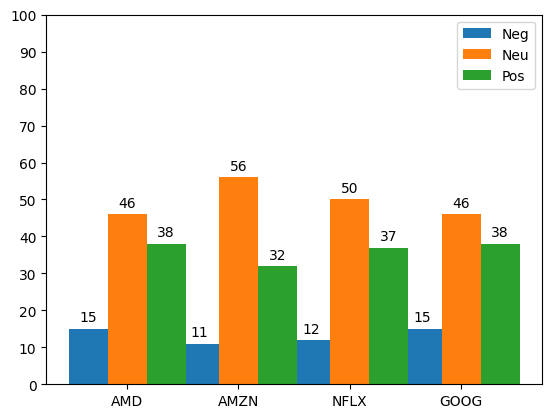

In [25]:
index = np.arange(len(company_tikcers))
score_label = np.arange(0, 110, 10)

bar_width = 0.35

fig, ax = plt.subplots()
barNeg = ax.bar(index - bar_width, dataset_company['Neg'], bar_width, label='Neg')
barNeu = ax.bar(index, dataset_company['Neu'], bar_width, label='Neu')
barPos = ax.bar(index + bar_width, dataset_company['Pos'], bar_width, label='Pos')

ax.set_xticks(index)
ax.set_xticklabels(company_tikcers)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)


ax.legend()

def insert_data_labels(bars):
  for bar in bars:
    bar_height = bar.get_height()
    ax.annotate('{0:.0f}'.format(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',
                va='bottom'
    )

insert_data_labels(barNeg)
insert_data_labels(barNeu)
insert_data_labels(barPos)

plt.show()

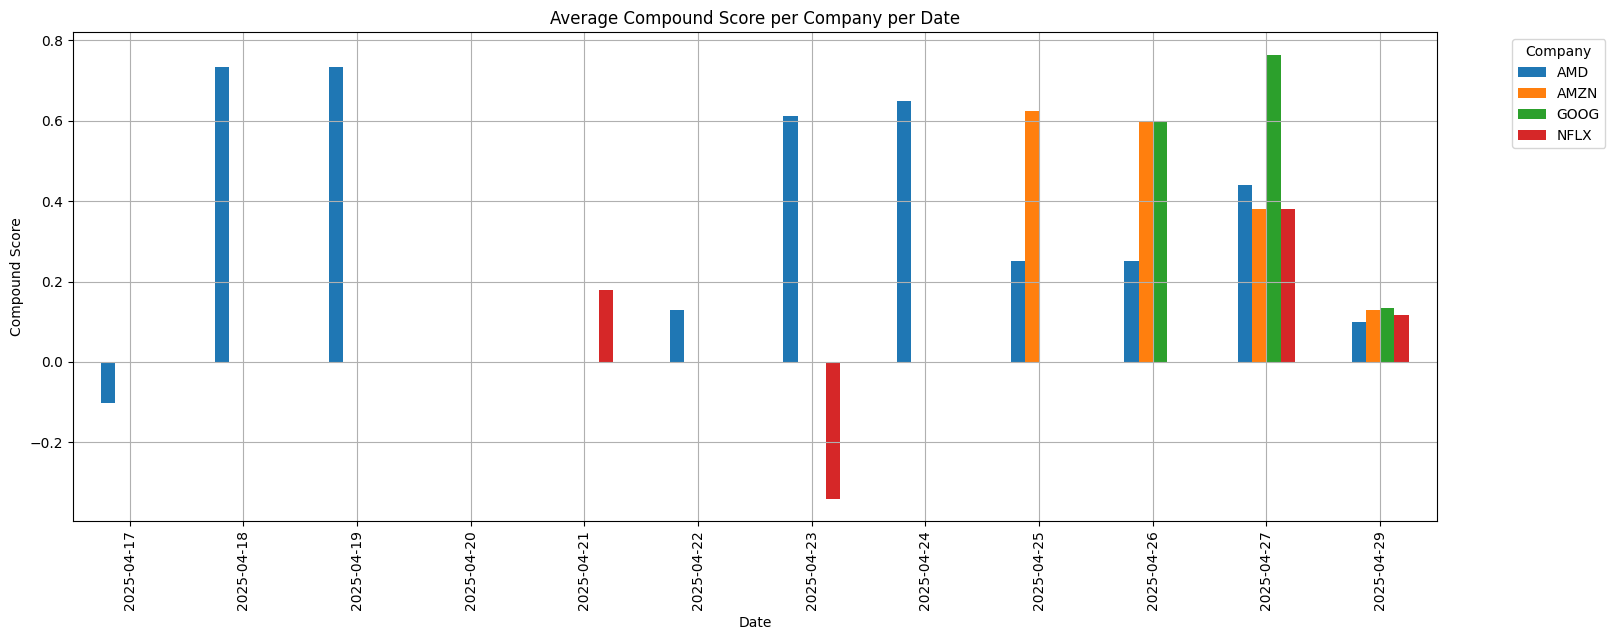

In [26]:
# Step 1: Group by 'Company' and 'Date', calculate mean of numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns.tolist()
mean_df = dataset.groupby(['Company', 'Date'])[numeric_cols].mean().reset_index()

# Step 2: Now, pivot the table so Companies become columns
pivot_df = mean_df.pivot(index='Date', columns='Company', values='Compound')

# Step 3: Plot it
pivot_df.plot(kind='bar', figsize=(16.2, 6.5))

plt.title('Average Compound Score per Company per Date')
plt.xlabel('Date')
plt.ylabel('Compound Score')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [28]:
def visualization(positive, neutral, negative):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('Aggregate sentiment value of the economic news headlines')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [29]:
def company_specific_sentiment_visualization(company_name):
    company_df = dataset[dataset['Company'] == company_name]
    numeric_cols = company_df.select_dtypes(include='number').columns.tolist()
    mean_df = company_df.groupby(['Company', 'Date'])[numeric_cols].mean().reset_index()

    temp = mean_df.pivot(index='Date', columns='Company', values='Compound')

    temp.plot(kind='line', figsize=(16.2, 6.5))

In [30]:
def company_specific_sentiment_and_stockclose_day_focus_visualization(company_name, company_stock_dataframe):
    # Filter the dataset for the specific company
    company_specific = dataset[dataset['Company'] == company_name]

    # Select numeric columns (sentiment data)
    numeric_cols = company_specific.select_dtypes(include='number').columns.tolist()
    mean_df = company_specific.groupby(['Company', 'Date'])[numeric_cols].mean().reset_index()

    # Pivot to get sentiment data (Compound) for each date
    temp_company = mean_df.pivot(index='Date', columns='Company', values='Compound')

    # Save the sentiment data to CSV (optional)
    temp_company.to_csv(company_name + '_SentimentAndValueOnDays.csv')

    # Read the CSV file back into a DataFrame (optional, can be skipped if not necessary)
    temp_dataframe = pd.read_csv("/content/" + company_name + "_SentimentAndValueOnDays.csv")

    # Merge the stock data (Close, High, Low, Open, Volume) with sentiment data
    temp_dataframe['Close'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['Close'].to_dict())
    temp_dataframe['High'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['High'].to_dict())
    temp_dataframe['Low'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['Low'].to_dict())
    temp_dataframe['Open'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['Open'].to_dict())
    temp_dataframe['Volume'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['Volume'].to_dict())

    # Drop rows where 'Close' is NaN (if there's no stock data for a given date)
    temp_dataframe = temp_dataframe.dropna(subset=['Close'])

    temp_dataframe = temp_dataframe.rename(columns={company_name: 'Compound'})


    # Return the final DataFrame with all the necessary columns
    return temp_dataframe


In [31]:
def company_compound_adjclose_normalized(company_name, company_combinated_dataframe):
    # Convert columns to numeric to avoid issues
    company_combinated_dataframe['Close'] = pd.to_numeric(company_combinated_dataframe['Close'], errors='coerce')
    company_combinated_dataframe['Compound'] = pd.to_numeric(company_combinated_dataframe['Compound'], errors='coerce')
    # Separate Date
    dates = company_combinated_dataframe['Date']

    # Select only numeric columns
    numeric_df = company_combinated_dataframe.drop(columns=['Date'])

    # Normalize only numeric data
    normalized_df = (numeric_df - numeric_df.mean()) / numeric_df.std()

    # Plot
    plt.figure(figsize=(16.2, 6.5))
    plt.title(company_name + ': Normalized Close values with Compounds')
    plt.plot(dates, normalized_df['Compound'], label='Compound')
    plt.plot(dates, normalized_df['Close'], label='Close')
    plt.xticks(rotation=70)
    plt.xlabel('Date')
    plt.ylabel('Compound')
    plt.legend()
    plt.grid(True)
    plt.show()


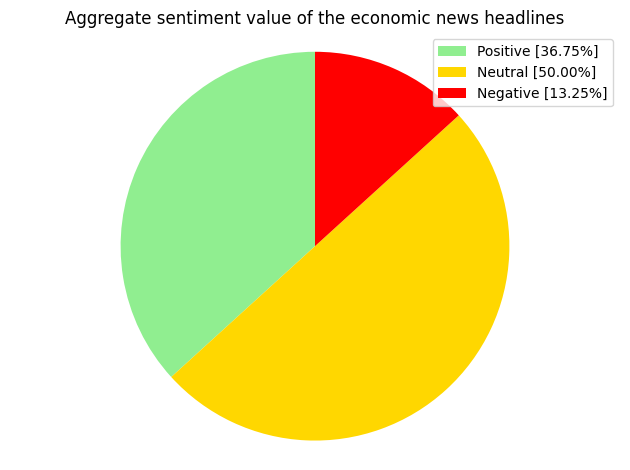

In [32]:
all_num = sentiment_result['pos'] + sentiment_result['neu'] + sentiment_result['neg']
pos_percent = percentage(part=sentiment_result['pos'], whole=all_num)
neu_percent = percentage(part=sentiment_result['neu'], whole=all_num)
neg_percent = percentage(part=sentiment_result['neg'], whole=all_num)

visualization(positive=pos_percent,neutral=neu_percent, negative=neg_percent)

In [35]:
amd_stock = pd.read_csv("/content/AMD_NLTK.csv")

nflx_stock = pd.read_csv("/content/NFLX_NLTK.csv")


In [36]:
def company_corr(company_combinated_dataframe):
    df = company_combinated_dataframe.copy()
    df.drop(['Date'], axis=1, inplace=True)

    plt.figure(figsize=(16, 10))
    sns.heatmap(df[['Open', 'Low', 'High', 'Close', 'Compound', 'Volume']].corr(), annot=True)
    plt.title('Correlation Heatmap')
    plt.show()

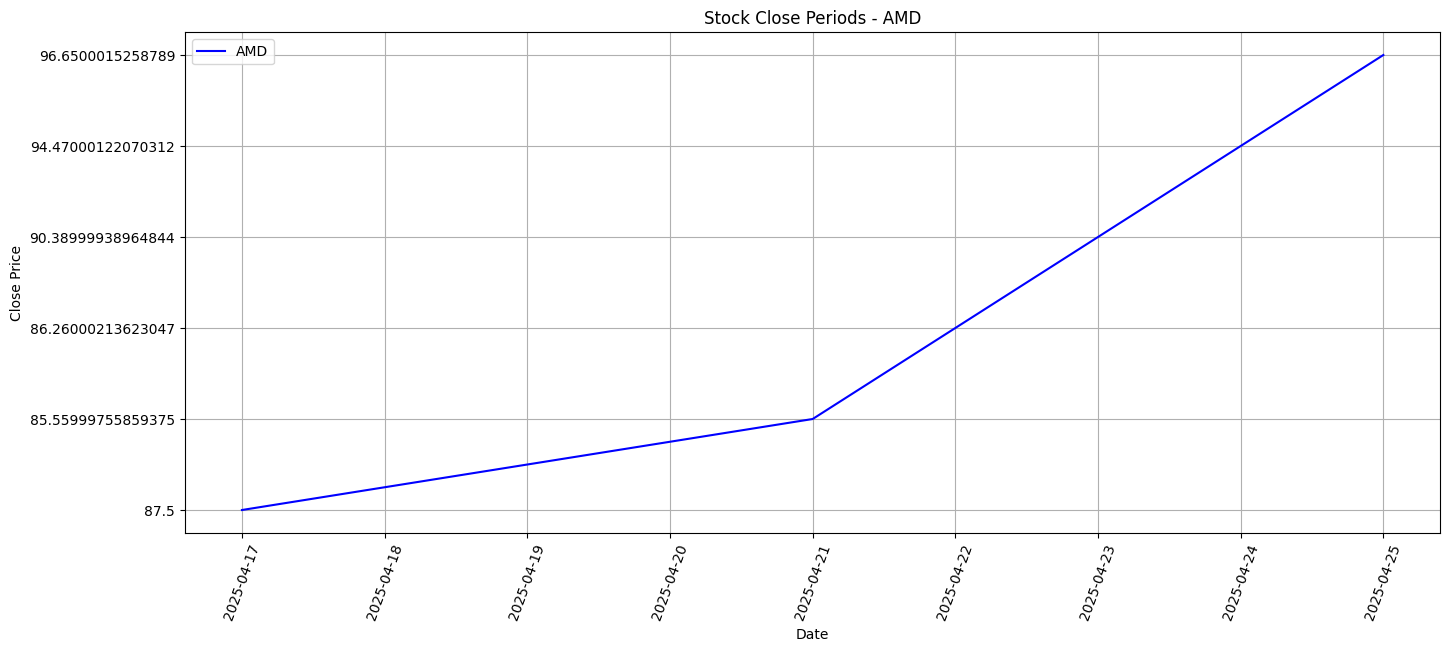

In [37]:
amd_stock['date'] = pd.to_datetime(amd_stock['date'])

plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - AMD')
x = amd_stock['date']
y = amd_stock['Close']
plt.plot(x, y, label='AMD', color='blue')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Close Price')  # "Adj Close" is wrong because your data has only 'Close'
plt.grid(True)
plt.legend()
plt.show()


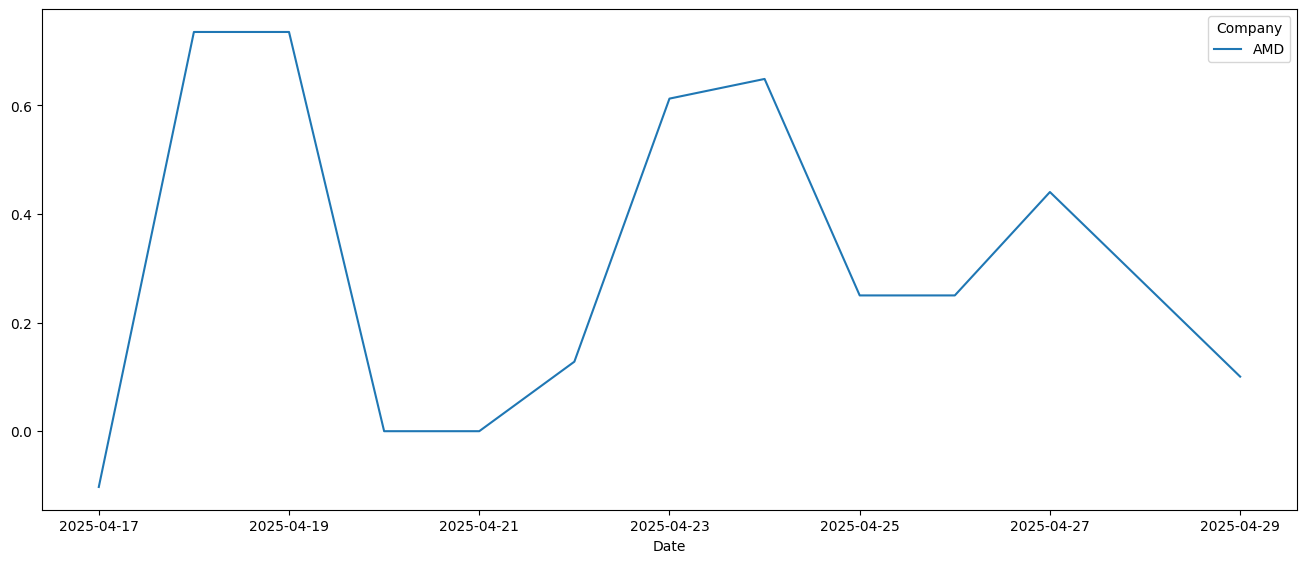

In [38]:
company_specific_sentiment_visualization('AMD')

In [39]:
AMD_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('AMD', amd_stock)
AMD_combinated_dataframe.head()


,Date,Compound,Close,High,Low,Open,Volume
0,2025-04-17,-0.1027,87.5,89.02999877929688,86.5199966430664,88.83999633789062,34693400
4,2025-04-21,0.0000,85.55999755859375,86.13999938964844,83.75,86.0199966430664,33855400
5,2025-04-22,0.1280,86.26000213623047,87.16999816894531,85.16999816894531,86.12000274658203,35236700
6,2025-04-23,0.6124,90.38999938964844,93.73999786376953,90.12000274658203,91.87999725341797,41102600
7,2025-04-24,0.6486,94.47000122070312,94.75,90.37000274658203,91.58999633789062,33681900


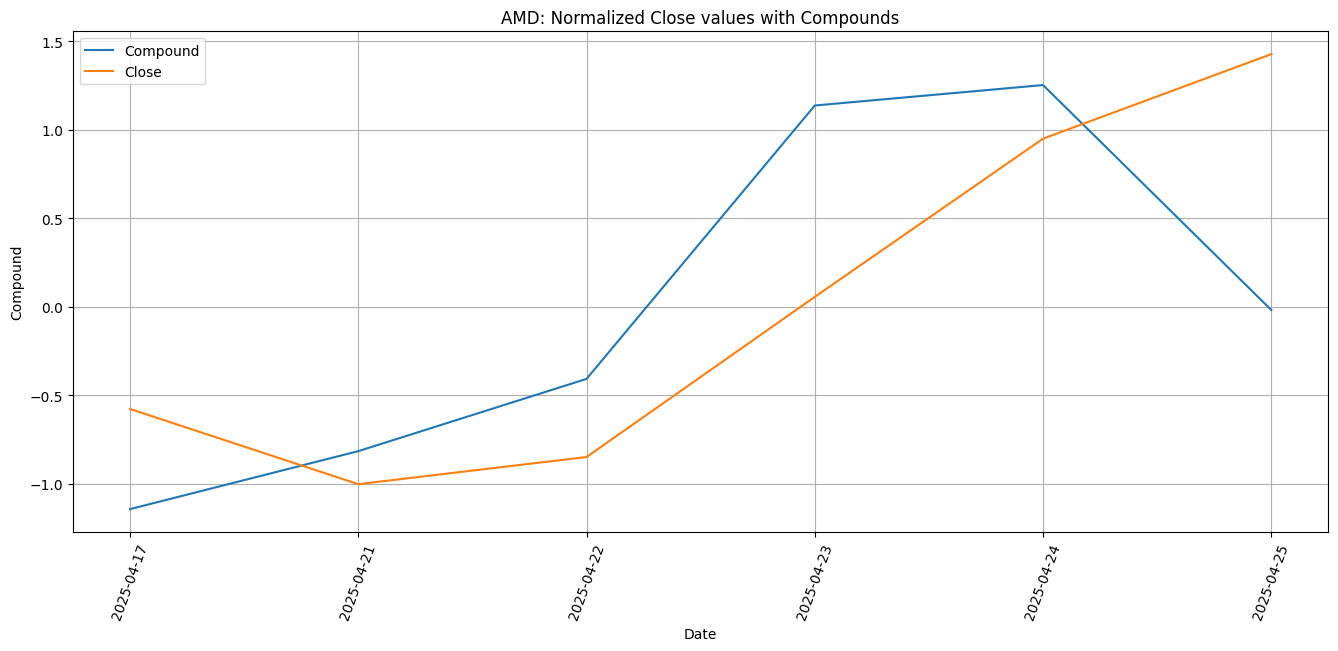

In [40]:
numeric_columns = ['Compound', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    AMD_combinated_dataframe[col] = pd.to_numeric(AMD_combinated_dataframe[col], errors='coerce')

company_compound_adjclose_normalized('AMD', AMD_combinated_dataframe)

In [42]:
Timeseries_AMD = AMD_combinated_dataframe
Timeseries_AMD.index = Timeseries_AMD['Date']
Timeseries_AMD = Timeseries_AMD.drop('Date', axis=1)
Timeseries_AMD.groupby(['Compound', 'Date'])
Timeseries_AMD.head()

,Compound,Close,High,Low,Open,Volume
Date,,,,,,
2025-04-17,-0.1027,87.500000,89.029999,86.519997,88.839996,34693400
2025-04-21,0.0000,85.559998,86.139999,83.750000,86.019997,33855400
2025-04-22,0.1280,86.260002,87.169998,85.169998,86.120003,35236700
2025-04-23,0.6124,90.389999,93.739998,90.120003,91.879997,41102600
2025-04-24,0.6486,94.470001,94.750000,90.370003,91.589996,33681900


In [42]:
Timeseries_AMD['Close'].to_csv('Timeseries_AMD_Close.csv')
Timeseries_AMD['Compound'].to_csv('Timeseries_AMD_compound.csv')

In [43]:
AMD_normalized_df=(AMD_combinated_dataframe[['Compound', 'Close']]-AMD_combinated_dataframe[['Compound', 'Close']].mean())/AMD_combinated_dataframe[['Compound', 'Close']].std()
AMD_normalized_df

,Compound,Close
Date,,
2025-04-17,-1.143912,-0.577960
2025-04-21,-0.816442,-1.002942
2025-04-22,-0.408301,-0.849597
2025-04-23,1.136259,0.055131
2025-04-24,1.251687,0.948906
2025-04-25,-0.019291,1.426462


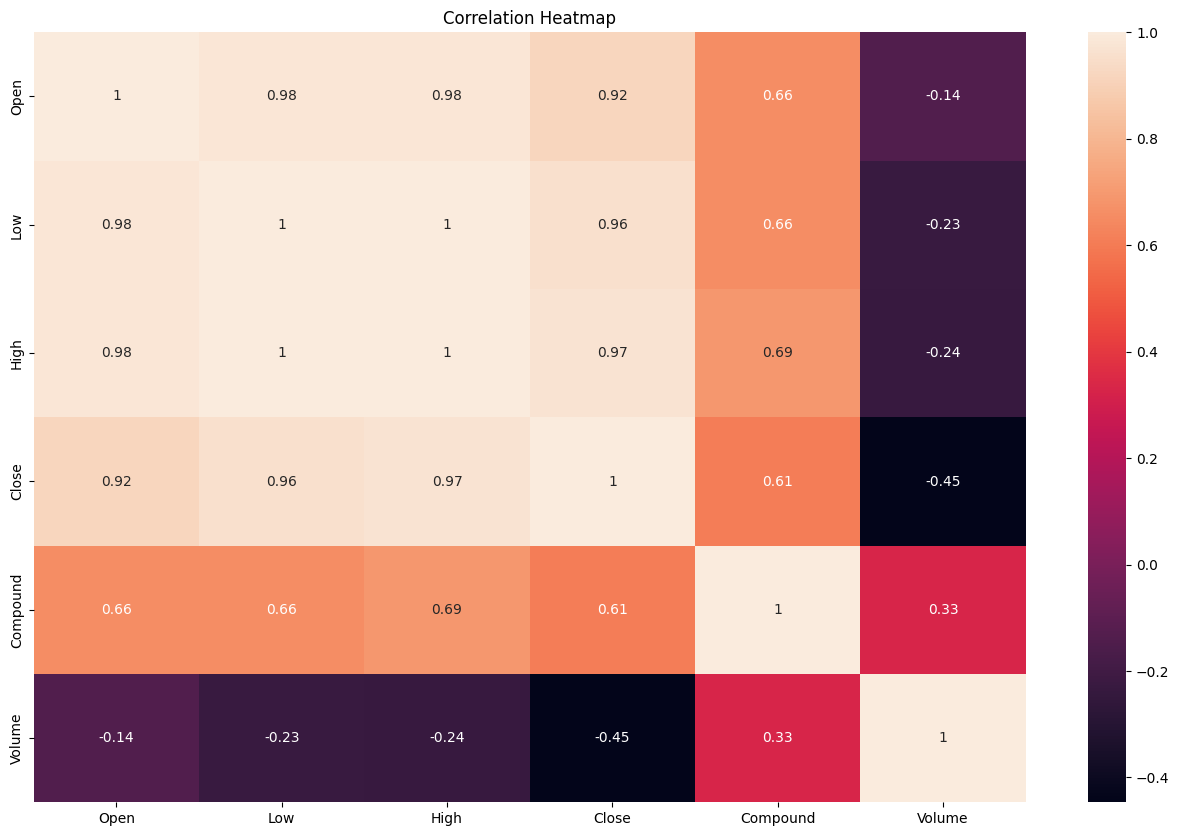

In [44]:
company_corr(AMD_combinated_dataframe)
# (Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.)


In [45]:
AMD_Close_series = pd.read_csv('Timeseries_AMD_Close.csv', index_col=[0], parse_dates=True)
# type(AMD_adjclose_series)
AMD_Close_series

,Close
Date,
2025-04-17,87.500000
2025-04-21,85.559998
2025-04-22,86.260002
2025-04-23,90.389999
2025-04-24,94.470001
2025-04-25,96.650002


In [46]:
AMD_Close_series.describe()

,Close
count,6.000000
mean,90.138334
std,4.564908
min,85.559998
25%,86.570002
50%,88.945000
75%,93.450001
max,96.650002


In [52]:
numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    amd_stock[col] = pd.to_numeric(amd_stock[col], errors='coerce')

pd.options.display.float_format = '{:,.3f}'.format
amd_stock.corr()

,Close,High,Low,Open,Volume,date
Close,1.000,0.968,0.956,0.918,-0.447,0.716
High,0.968,1.000,0.996,0.983,-0.236,0.683
Low,0.956,0.996,1.000,0.982,-0.232,0.665
Open,0.918,0.983,0.982,1.000,-0.141,0.562
Volume,-0.447,-0.236,-0.232,-0.141,1.000,-0.232
date,0.716,0.683,0.665,0.562,-0.232,1.000


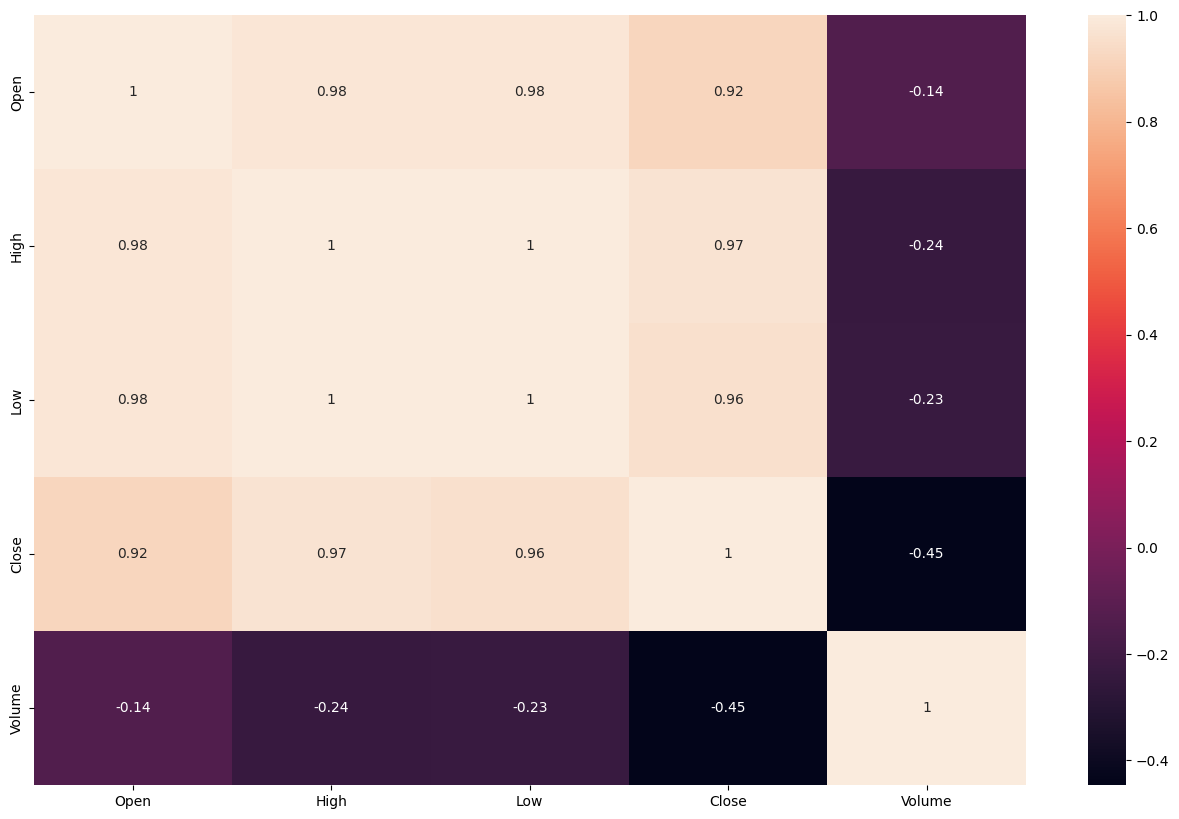

In [53]:
plt.figure(figsize=(16, 10))
sns.heatmap(amd_stock[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True)
plt.show()

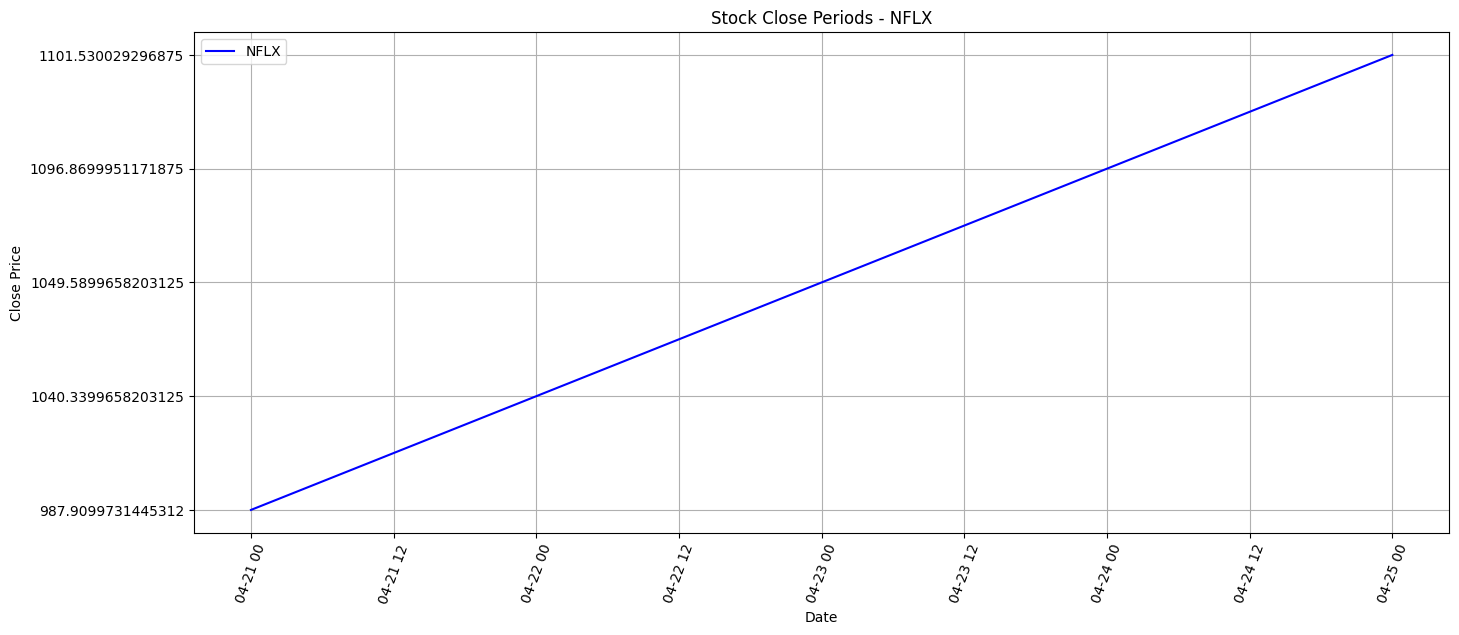

In [59]:
nflx_stock['date'] = pd.to_datetime(nflx_stock['date'])

plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - NFLX')
x = nflx_stock['date']
y = nflx_stock['Close']
plt.plot(x, y, label='NFLX', color='blue')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Close Price')  # "Adj Close" is wrong because your data has only 'Close'
plt.grid(True)
plt.legend()
plt.show()

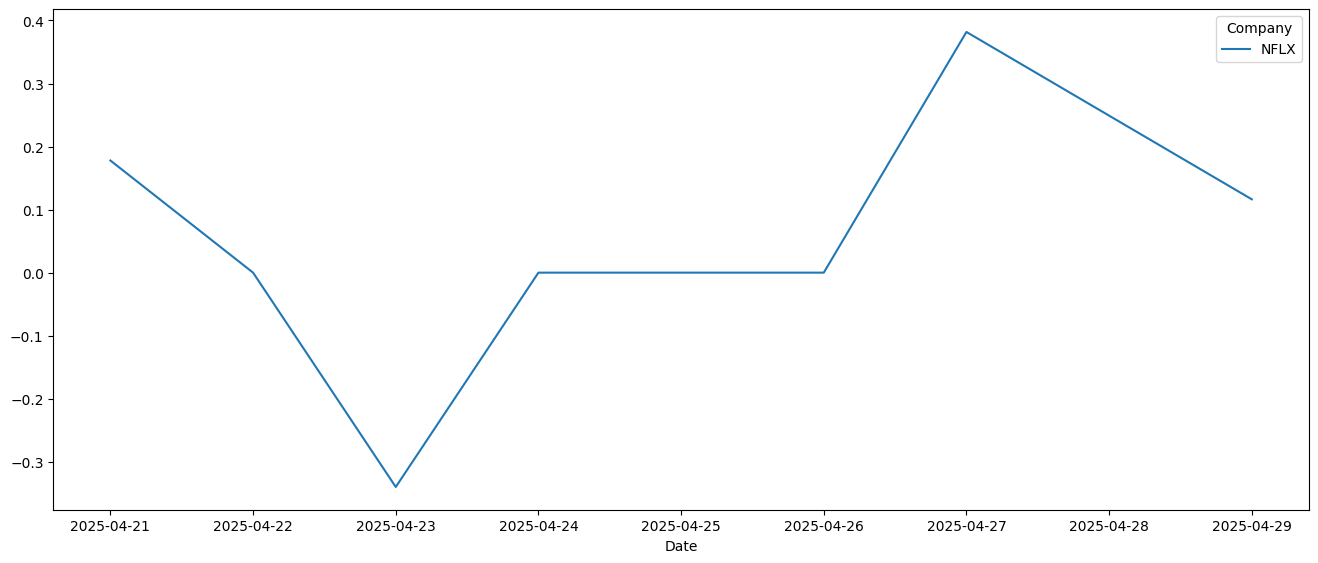

In [60]:
company_specific_sentiment_visualization('NFLX')

In [79]:
NFLX_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('NFLX', nflx_stock)
NFLX_combinated_dataframe.head()

,Date,Compound,Close,High,Low,Open,Volume
0,2025-04-21,0.178,987.9099731445312,1019.0,973.0499877929688,984.4000244140625,9775700
1,2025-04-22,0.000,1040.3399658203125,1064.969970703125,1004.52001953125,1005.2999877929688,9368900
2,2025-04-23,-0.340,1049.5899658203125,1061.25,1032.0,1047.219970703125,6471900
3,2025-04-24,0.000,1096.8699951171875,1101.0,1047.02001953125,1048.0,6381900
4,2025-04-25,0.000,1101.530029296875,1106.800048828125,1091.0,1097.0400390625,3950000


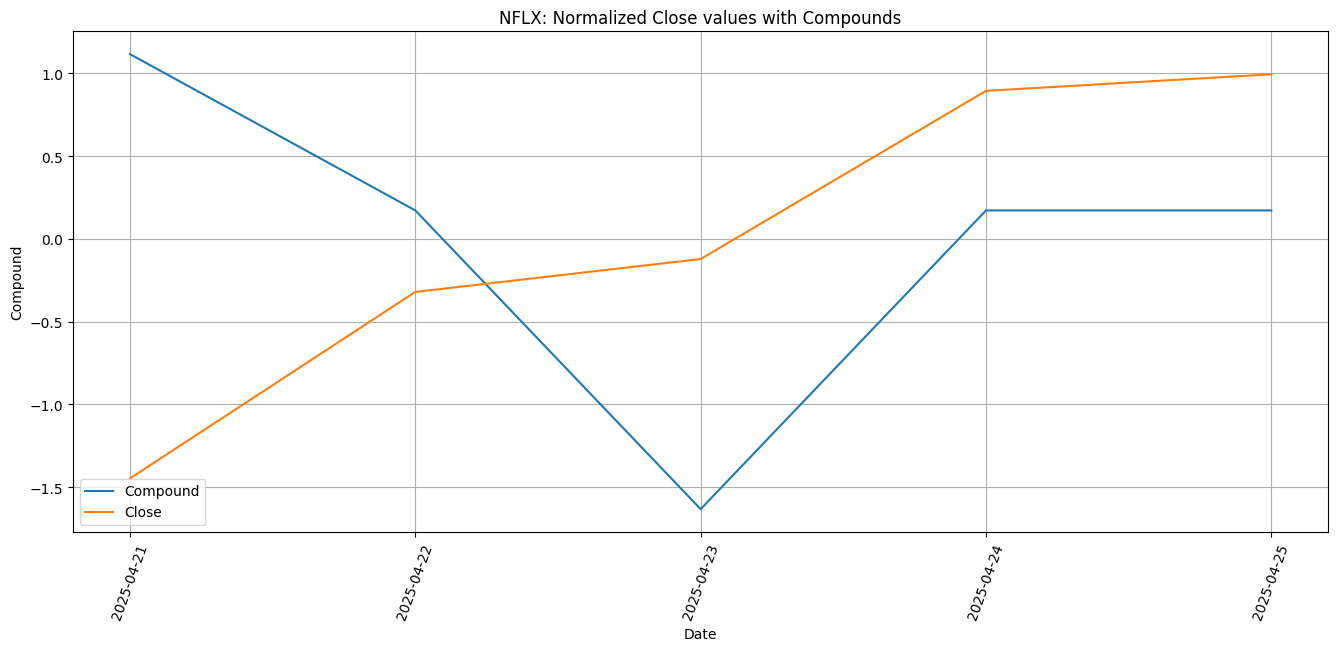

In [63]:
NFLX_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('NFLX', nflx_stock) # Assign to NFLX_combinated_dataframe
NFLX_combinated_dataframe.head()

numeric_columns = ['Compound', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    NFLX_combinated_dataframe[col] = pd.to_numeric(NFLX_combinated_dataframe[col], errors='coerce') # Now use NFLX_combinated_dataframe

company_compound_adjclose_normalized('NFLX', NFLX_combinated_dataframe)

In [64]:
Timeseries_NFLX = NFLX_combinated_dataframe
Timeseries_NFLX.index = Timeseries_NFLX['Date']
Timeseries_NFLX = Timeseries_NFLX.drop('Date', axis=1)
Timeseries_NFLX.groupby(['Compound', 'Date'])
Timeseries_NFLX.head()

,Compound,Close,High,Low,Open,Volume
Date,,,,,,
2025-04-21,0.178,987.910,"1,019.000",973.050,984.400,9775700
2025-04-22,0.000,"1,040.340","1,064.970","1,004.520","1,005.300",9368900
2025-04-23,-0.340,"1,049.590","1,061.250","1,032.000","1,047.220",6471900
2025-04-24,0.000,"1,096.870","1,101.000","1,047.020","1,048.000",6381900
2025-04-25,0.000,"1,101.530","1,106.800","1,091.000","1,097.040",3950000


In [65]:
Timeseries_NFLX['Close'].to_csv('Timeseries_AMD_Close.csv')
Timeseries_NFLX['Compound'].to_csv('Timeseries_AMD_compound.csv')

In [66]:
NFLX_normalized_df=(NFLX_combinated_dataframe[['Compound', 'Close']]-NFLX_combinated_dataframe[['Compound', 'Close']].mean())/NFLX_combinated_dataframe[['Compound', 'Close']].std()
NFLX_normalized_df

,Compound,Close
Date,,
2025-04-21,1.116,-1.447
2025-04-22,0.172,-0.320
2025-04-23,-1.633,-0.122
2025-04-24,0.172,0.894
2025-04-25,0.172,0.995


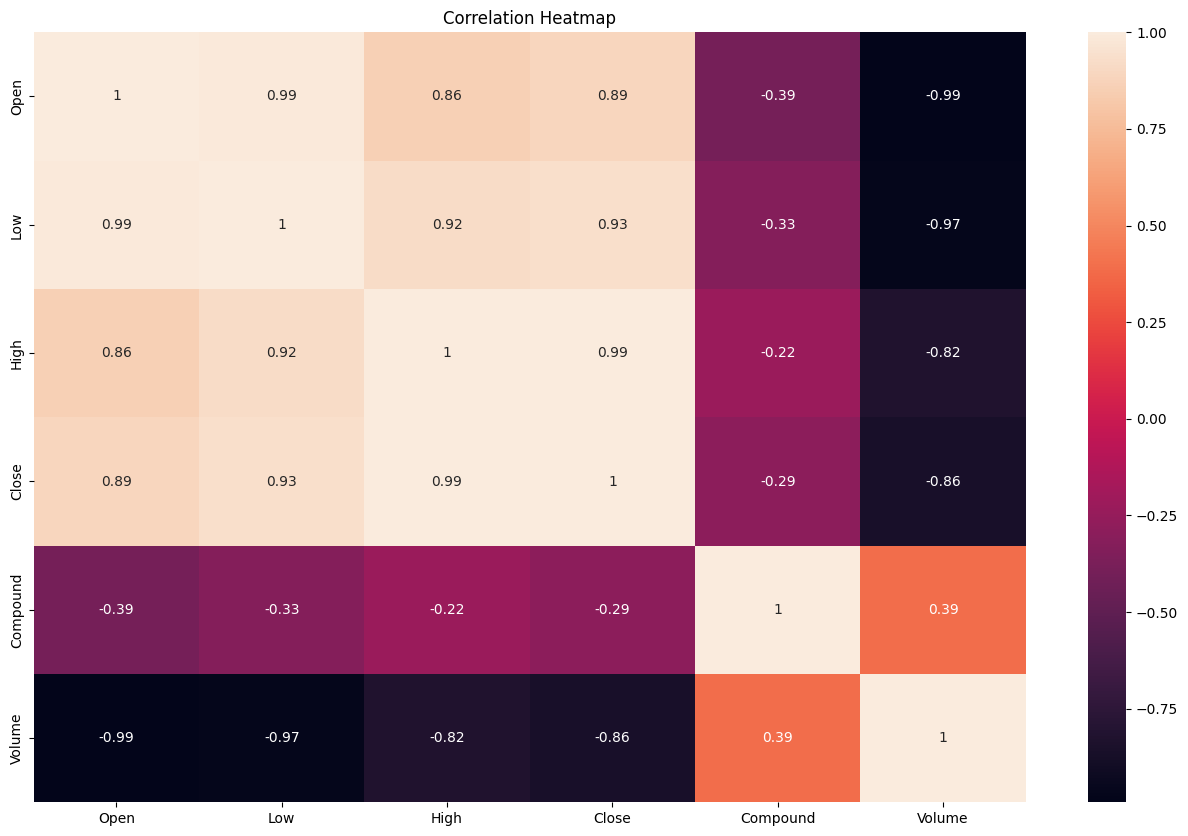

In [67]:
company_corr(NFLX_combinated_dataframe)
# (Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.)


In [68]:
NFLX_Close_series = pd.read_csv('Timeseries_AMD_Close.csv', index_col=[0], parse_dates=True)
# type(AMD_adjclose_series)
NFLX_Close_series

,Close
Date,
2025-04-21,987.910
2025-04-22,"1,040.340"
2025-04-23,"1,049.590"
2025-04-24,"1,096.870"
2025-04-25,"1,101.530"


In [69]:
NFLX_Close_series.describe()

,Close
count,5.000
mean,"1,055.248"
std,46.538
min,987.910
25%,"1,040.340"
50%,"1,049.590"
75%,"1,096.870"
max,"1,101.530"


In [55]:
numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    nflx_stock[col] = pd.to_numeric(nflx_stock[col], errors='coerce')
nflx_stock['date'] = pd.to_datetime(nflx_stock['date'])
pd.options.display.float_format = '{:,.3f}'.format
nflx_stock.corr()

,Close,High,Low,Open,Volume,date
Close,1.000,0.994,0.935,0.887,-0.863,0.964
High,0.994,1.000,0.919,0.859,-0.825,0.945
Low,0.935,0.919,1.000,0.990,-0.973,0.990
Open,0.887,0.859,0.990,1.000,-0.992,0.972
Volume,-0.863,-0.825,-0.973,-0.992,1.000,-0.963
date,0.964,0.945,0.990,0.972,-0.963,1.000


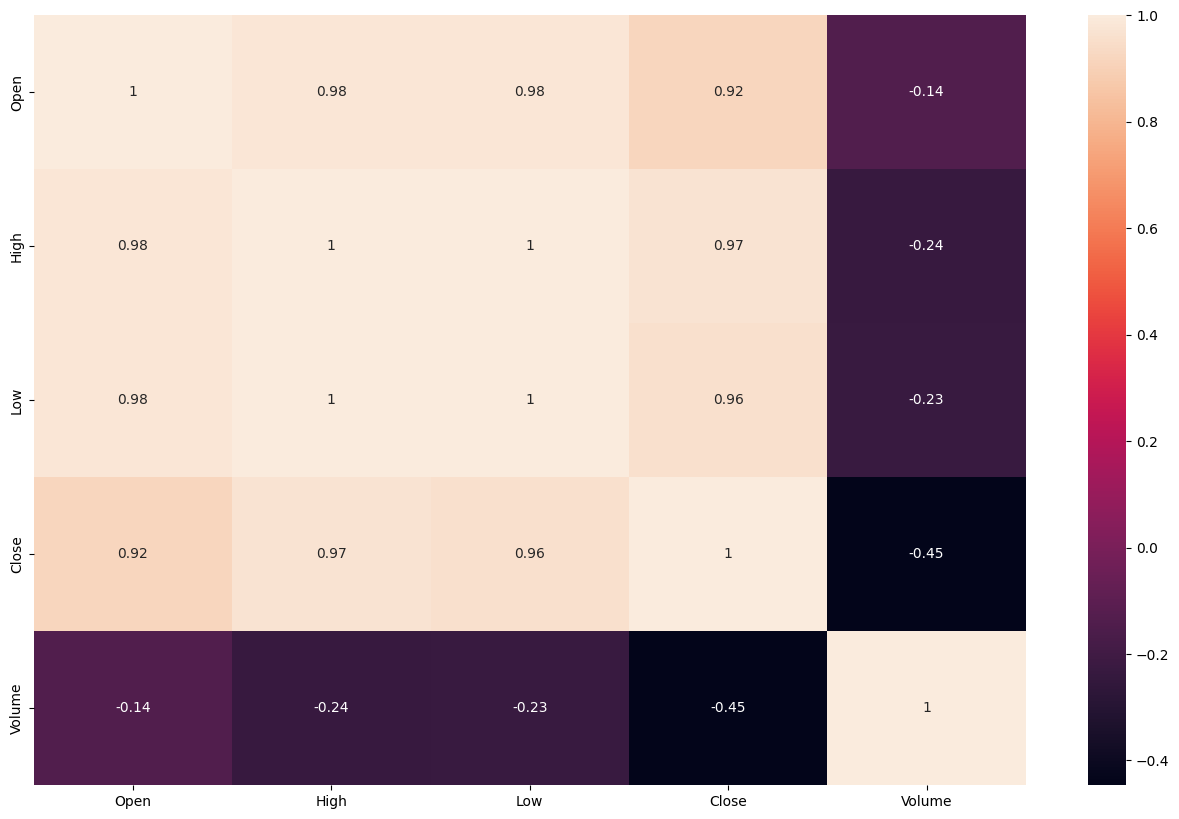

In [56]:
plt.figure(figsize=(16, 10))
sns.heatmap(amd_stock[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True)
plt.show()